In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pandas as pd

**LOAD QMINST DATASET **

In [2]:
# Load Fashion MNIST dataset and preprocess

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

**Visualize the train dataset**

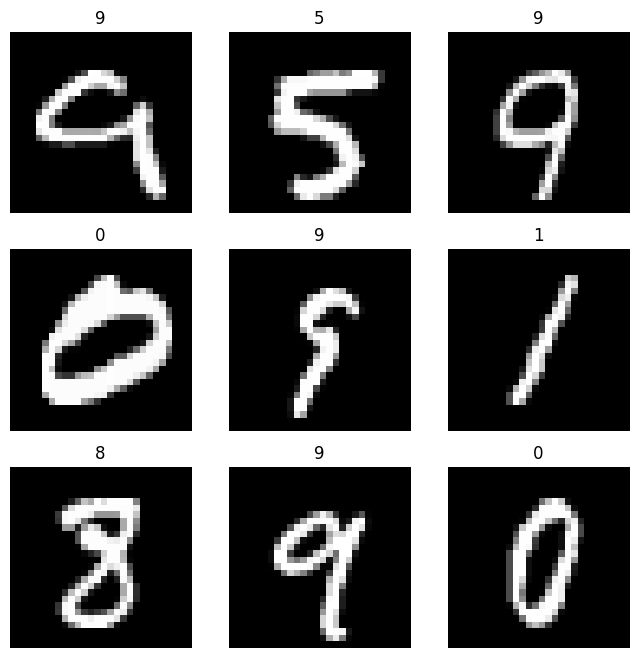

In [21]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

**Visualize test data**

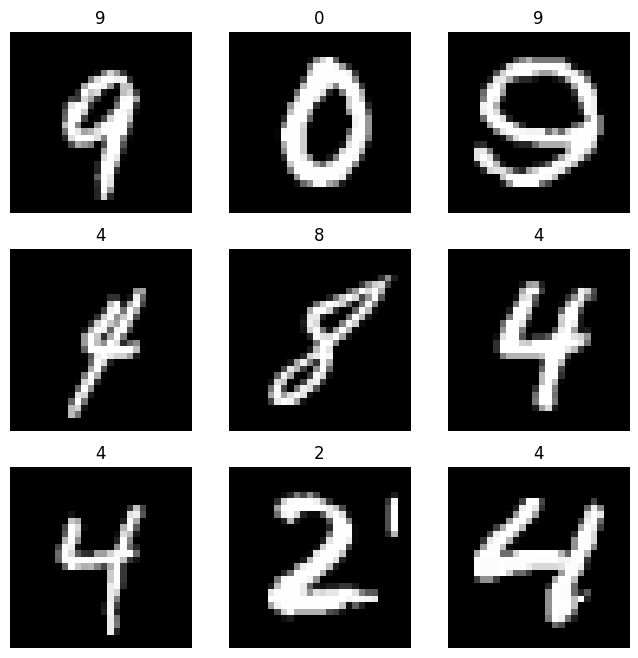

In [22]:
#Test DataSet
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

**Neural Network**

In [38]:
#Define the neural network architecture
class initial_model(nn.Module):
    def __init__(self):
        super(initial_model, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x



**Training function and optimizer**

In [46]:
def train(model,train_loader,criterion,optimizer,activation_function=nn.ReLU(),epochs=5):
# Train the neural network
    model.train()
    for epoch in range(epochs):
        #model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:  # print every 100 mini-batches
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                running_loss = 0.0

    print('Finished Training')

**Model Evaluation**

In [45]:
# Evaluate function
def evaluate(model,test_loader):
    model.eval()
    correct = 0
    predictions = []
    actual_labels=[]
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.numpy())  # Store predictions
            actual_labels.extend(labels.numpy())    # Store actual labels
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy={ correct / total}
    return accuracy,predictions, actual_labels

**Evaluate Initial Model**

In [47]:
# Initialize the neural network
model = initial_model()
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#activation=nn.ReLU()
train(model, train_loader, criterion,optimizer,epochs=5)
accuracy, predictions,actual_labels = evaluate(model, test_loader)
print("Initial Test Accuracy:",accuracy)

Epoch 1, Batch 100, Loss: 1.0319840988516809
Epoch 1, Batch 200, Loss: 0.4467392176389694
Epoch 1, Batch 300, Loss: 0.3775040802359581
Epoch 1, Batch 400, Loss: 0.3456498070061207
Epoch 1, Batch 500, Loss: 0.34298179477453233
Epoch 1, Batch 600, Loss: 0.2924286349862814
Epoch 1, Batch 700, Loss: 0.2829448081552982
Epoch 1, Batch 800, Loss: 0.2559429433941841
Epoch 1, Batch 900, Loss: 0.250639445707202
Epoch 2, Batch 100, Loss: 0.210436523668468
Epoch 2, Batch 200, Loss: 0.2293991031497717
Epoch 2, Batch 300, Loss: 0.20344482887536286
Epoch 2, Batch 400, Loss: 0.19761018861085178
Epoch 2, Batch 500, Loss: 0.1858900086581707
Epoch 2, Batch 600, Loss: 0.19098695758730172
Epoch 2, Batch 700, Loss: 0.17943280283361673
Epoch 2, Batch 800, Loss: 0.174819322116673
Epoch 2, Batch 900, Loss: 0.16135591443628072
Epoch 3, Batch 100, Loss: 0.1465078818798065
Epoch 3, Batch 200, Loss: 0.14878889633342623
Epoch 3, Batch 300, Loss: 0.15223964016884564
Epoch 3, Batch 400, Loss: 0.13265572547912596
Epoc

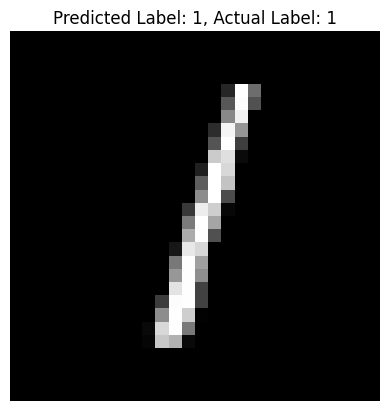

In [48]:
# Visualize a specific test image
index_to_visualize = 2  # Change this index based on your preference
image, label = test_loader.dataset[index_to_visualize]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {labels_map[predictions[index_to_visualize]]}, Actual Label: {labels_map[actual_labels[index_to_visualize]]}')
plt.axis('off')
plt.show()

**Adding another Dense layer of 128 nodes**

In [49]:
#Define the neural network architecture
class deep_model(nn.Module):
    def __init__(self):
        super(deep_model, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64,10)
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x= torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [50]:
# Initialize the neural network
model = deep_model()
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train(model, train_loader, criterion, optimizer, epochs=5)
accuracy, predictions,actual_labels = evaluate(model, test_loader)
print("Deep Model Test Accuracy:",accuracy)

Epoch 1, Batch 100, Loss: 1.0410084307193757
Epoch 1, Batch 200, Loss: 0.4685035166144371
Epoch 1, Batch 300, Loss: 0.40151229709386826
Epoch 1, Batch 400, Loss: 0.3440864232182503
Epoch 1, Batch 500, Loss: 0.32792375415563585
Epoch 1, Batch 600, Loss: 0.30026283212006094
Epoch 1, Batch 700, Loss: 0.26334729984402655
Epoch 1, Batch 800, Loss: 0.23759450040757657
Epoch 1, Batch 900, Loss: 0.2168851861730218
Epoch 2, Batch 100, Loss: 0.20524736627936363
Epoch 2, Batch 200, Loss: 0.18478294745087623
Epoch 2, Batch 300, Loss: 0.18525116827338933
Epoch 2, Batch 400, Loss: 0.1694878584332764
Epoch 2, Batch 500, Loss: 0.16161260660737753
Epoch 2, Batch 600, Loss: 0.17190438080579043
Epoch 2, Batch 700, Loss: 0.1644401926919818
Epoch 2, Batch 800, Loss: 0.15341778874397277
Epoch 2, Batch 900, Loss: 0.15189529836177826
Epoch 3, Batch 100, Loss: 0.11667697614058853
Epoch 3, Batch 200, Loss: 0.14603453110903503
Epoch 3, Batch 300, Loss: 0.11895181464031339
Epoch 3, Batch 400, Loss: 0.126080408208

**Increase the current number of nodes in the layer to 256**

In [51]:
#Define the neural network architecture
class wide_model(nn.Module):
    def __init__(self):
        super(wide_model, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x



In [52]:
# Initialize the neural network
model = wide_model()
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train(model, train_loader, criterion, optimizer, epochs=5)
accuracy, predictions,actual_labels = evaluate(model, test_loader)
print("Wide Model Test Accuracy:",accuracy)

Epoch 1, Batch 100, Loss: 0.9398327751457691
Epoch 1, Batch 200, Loss: 0.44894114404916763
Epoch 1, Batch 300, Loss: 0.3787138964235783
Epoch 1, Batch 400, Loss: 0.34663759395480154
Epoch 1, Batch 500, Loss: 0.29696712642908096
Epoch 1, Batch 600, Loss: 0.2749520232528448
Epoch 1, Batch 700, Loss: 0.2629319277405739
Epoch 1, Batch 800, Loss: 0.24692145958542824
Epoch 1, Batch 900, Loss: 0.20913100738078355
Epoch 2, Batch 100, Loss: 0.20517863005399703
Epoch 2, Batch 200, Loss: 0.18132423292845487
Epoch 2, Batch 300, Loss: 0.16659764207899572
Epoch 2, Batch 400, Loss: 0.17283860728144645
Epoch 2, Batch 500, Loss: 0.16723256886005403
Epoch 2, Batch 600, Loss: 0.16115056520327925
Epoch 2, Batch 700, Loss: 0.15316321671009064
Epoch 2, Batch 800, Loss: 0.1499151744134724
Epoch 2, Batch 900, Loss: 0.13720235265791417
Epoch 3, Batch 100, Loss: 0.12151058521121741
Epoch 3, Batch 200, Loss: 0.1297267073020339
Epoch 3, Batch 300, Loss: 0.12543296542018653
Epoch 3, Batch 400, Loss: 0.111823951359

Initial Baseline accuracy of the Model was 96.05% and by adding a dense layer of 128 nodes accuracy had increased slightly to 96.83%,and with adding  by increasing the current number of nodes in the layer to 256 the accuracy was 96.75%.

# **Hyperparameter Tuning**

**Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.**

In [53]:
#Define the neural network architecture
class hypertuning(nn.Module):
    def __init__(self,dropout_rate,activation):
        super(hypertuning, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc3 = nn.Linear(64, 10)
        self.activation = activation

    def forward(self,x):
        x = x.view(-1, 28 * 28)
        x =self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x



In [54]:
#model_list = list()
criterion_list = list()
activation_list = list()
optimizer_list = list()
dropout_list = list()
accuracy_list=list()

In [55]:
criterion_names = [nn.CrossEntropyLoss,nn.NLLLoss]
optimizers = [optim.Adam, optim.SGD]
activation= [nn.Sigmoid(),nn.ReLU(), nn.Tanh()]
dropout_rates=[0.2,0.5]
for dropout_rate in dropout_rates:
  for activation_function  in activation:
    for criterion_name in criterion_names:
      for optimizer_name in optimizers:
        model = hypertuning(dropout_rate,activation_function)
        optimize = optimizer_name(model.parameters(), lr=0.001)
        criterion=criterion_name()
          # Train the model
        train(model,train_loader,criterion,optimize,activation_function,epochs=5)

          # Evaluate on the test set
        test_accuracy, predictions,actual_labels = evaluate(model, test_loader)

          # Report results
        criterion_list.append(criterion_name.__name__)
        optimizer_list.append(optimizer_name.__name__)
        activation_list.append(activation_function.__class__.__name__)
        dropout_list.append(dropout_rate)
        accuracy_list.append(test_accuracy)


hyperparam_list = pd.DataFrame({'criterion':criterion_list, 'optimizer':optimizer_list, 'activation':activation_list,'Dropout Rate':dropout_list, 'Accuracy':accuracy_list})
hyperparam_sorted=hyperparam_list.sort_values(by='Accuracy', ascending=False, inplace=True)






Epoch 1, Batch 100, Loss: 1.98241619348526
Epoch 1, Batch 200, Loss: 1.1586242723464966
Epoch 1, Batch 300, Loss: 0.7574405658245087
Epoch 1, Batch 400, Loss: 0.5706904631853104
Epoch 1, Batch 500, Loss: 0.46871946692466737
Epoch 1, Batch 600, Loss: 0.4350895076990128
Epoch 1, Batch 700, Loss: 0.3556955824792385
Epoch 1, Batch 800, Loss: 0.35932225942611695
Epoch 1, Batch 900, Loss: 0.3352844862639904
Epoch 2, Batch 100, Loss: 0.30862410575151444
Epoch 2, Batch 200, Loss: 0.27736405603587627
Epoch 2, Batch 300, Loss: 0.2661598752439022
Epoch 2, Batch 400, Loss: 0.26180385835468767
Epoch 2, Batch 500, Loss: 0.26071149796247484
Epoch 2, Batch 600, Loss: 0.2650161398202181
Epoch 2, Batch 700, Loss: 0.24261262387037277
Epoch 2, Batch 800, Loss: 0.23540566362440585
Epoch 2, Batch 900, Loss: 0.2329515041410923
Epoch 3, Batch 100, Loss: 0.20802880808711052
Epoch 3, Batch 200, Loss: 0.20196749426424504
Epoch 3, Batch 300, Loss: 0.2056250737607479
Epoch 3, Batch 400, Loss: 0.19717232778668403
E

In [56]:
from tabulate import tabulate
print(tabulate(hyperparam_list, headers = 'keys', tablefmt = 'psql'))

+----+------------------+-------------+--------------+----------------+-----------------------+
|    | criterion        | optimizer   | activation   |   Dropout Rate | Accuracy              |
|----+------------------+-------------+--------------+----------------+-----------------------|
|  0 | CrossEntropyLoss | Adam        | Sigmoid      |            0.2 | {0.9614833333333334}  |
|  1 | CrossEntropyLoss | SGD         | Sigmoid      |            0.2 | {0.11318333333333333} |
| 22 | NLLLoss          | Adam        | Tanh         |            0.5 | {0.10385}             |
| 21 | CrossEntropyLoss | SGD         | Tanh         |            0.5 | {0.8231}              |
| 20 | CrossEntropyLoss | Adam        | Tanh         |            0.5 | {0.9482166666666667}  |
| 19 | NLLLoss          | SGD         | ReLU         |            0.5 | {0.0992}              |
| 18 | NLLLoss          | Adam        | ReLU         |            0.5 | {0.11318333333333333} |
| 17 | CrossEntropyLoss | SGD         | 

Hyperparameter tuning for differnt parameter is as shown above.CrossEntropyloss has better accuracy than NLLLoss.

Best Hyperparametrs: Criterion='CrossEntropyLoss', Optimizer='Adam', Activation=ReLU, Dropout=0.2